# RECOMMENDATION SYSTEM

Recommender systems are very crucial for any business and organization. It allows users to find new and relevant products.
You might have observe that Now a days model decides what we want to buy, what we want to see, what we want to eat, where we want to eat, where we want to go.

This all is based on different techniques of recommendation which I have explained below.

<b>Different Techniques Of Recommendation:</b>
<ul> 
  <li>POPULARITY BASED
    <ul>
        <li>This method recommends most liked product, It is same for all users</li>
    </ul>
    </li>
    <li>CONTENT BASED
    <ul>
        <li>This model recommends product based on user history</li>
        <li>For example, If you see action movie, model recommends other action movies</li>
    </ul>
    </li>
    <li>ITEM-BASED COLLABORATIVE FILTERING
    <ul>
        <li>This model recommends product which are highly correlated with each other.</li>
        <li>For example, If you buy laptop, model recommends laptop-bag as most people have bought this two things together</li>       
    </ul>
    </li>
    <li>USER-BASED COLLABORATIVE FILTERING
    <ul>
        <li>This model finds similar user behaviour and recommend product to one user based on another similar user</li>
    <li>For example, you have watched 10 different movies and rated them differently, model finds similar user to you who have given same rating to those movies and then if this user watches another new movie and likes it then that movie is recommended to you if you have not seen it yet.</li>
        </ul>
     </li>
     <li>MATRIX FACTORIZATION
    <ul><li>This model finds latent features between users and movies based on that it estimates rating of a movie per user and if rating is high then it gets recommended to that user</li></ul>
    </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors

In [2]:
movies=pd.read_csv('E:\\Education\\Datascience\\project\\ml-latest-small\\movies.csv')
ratings=pd.read_csv('E:\\Education\\Datascience\\project\\ml-latest-small\\ratings.csv')

# DATA EXPLORATION

In [3]:
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
print("movies:\n")
print(movies.info(),'\n\n')

print("ratings:\n")
print(ratings.info())

movies:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None 


ratings:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Based on above we can observe that:

<ul>
    <li>There is no null values in data.</li>
    <li>There are total 9742 different movies in this data.</li>
    <li>There are nearly 1 million ratings</li>
</ul>

Now let's merge datasets based on movieId

In [5]:
mr = pd.merge(movies, ratings, on='movieId')
mr.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [6]:
print(mr.shape)

(100836, 6)


In [7]:
print("Top five movies watched:\n")
print(mr.title.value_counts().sort_values(ascending=False).head(),'\n')

print("Top five user who watched most movies:\n")
print(mr.userId.value_counts().sort_values(ascending=False).head(),'\n')

Top five movies watched:

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64 

Top five user who watched most movies:

414    2698
599    2478
474    2108
448    1864
274    1346
Name: userId, dtype: int64 



# FEATURE ENGINEERING

Let's count average rating of each movie

In [8]:
rating_count = mr.groupby(by=['title'])['rating'].count().reset_index().rename(columns={'rating':'total_rating_count'})
print(rating_count.shape,'\n')
rating_count.head()

(9719, 2) 



,title,total_rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [9]:
rating_sum = mr.groupby(by=['title'])['rating'].sum().reset_index().rename(columns={'rating':'total_rating_sum'})

print(rating_sum.shape)

rating_sum.tail()

(9719, 2)


,title,total_rating_sum
9714,eXistenZ (1999),85.0
9715,xXx (2002),66.5
9716,xXx: State of the Union (2005),10.0
9717,¡Three Amigos! (1986),81.5
9718,À nous la liberté (Freedom for Us) (1931),1.0


In [10]:
data = pd.merge(mr, rating_count, on='title', how='left')
data = pd.merge(data, rating_sum, on='title', how='left')

data.drop(columns=['timestamp'],inplace=True)

In [11]:
print(data.shape)

data.head()

(100836, 7)


,movieId,title,genres,userId,rating,total_rating_count,total_rating_sum
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215,843.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215,843.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215,843.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215,843.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215,843.0


In [12]:
data['avg_rating'] = data['total_rating_sum'] / data['total_rating_count']

data.head()

,movieId,title,genres,userId,rating,total_rating_count,total_rating_sum,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215,843.0,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215,843.0,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215,843.0,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215,843.0,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215,843.0,3.92093


In [13]:
data = data[data['total_rating_count']>30]
print(data.shape)

(57391, 8)


There may be some movies which has high average rating but it is becuase less number of people have given rating.<br>
So only consider movies which has been rated by more than 30 users

# TOP 10 POPULAR MOVIES RECOMMENDATION

In [14]:
def top_10(data):
    
    data_t = data.drop_duplicates(subset='title', keep='first', inplace=False)
    data_t = data_t[data_t['total_rating_count']>200]
    
    top_movies = data_t.sort_values(by=['avg_rating', 'total_rating_count'] ,axis=0, ascending=False)
    return top_movies[['title','genres','total_rating_count','avg_rating']]

In [15]:
top_10(data)

,title,genres,total_rating_count,avg_rating
8652,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
49835,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
2379,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,4.237745
6853,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
14106,Schindler's List (1993),Drama|War,220,4.225000
24643,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
7860,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
45014,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
10019,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
16228,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290


# CONTENT BASED RECOMMENDATION

In this method you can make use of description of movies also,  but here I have just consider genres of movie

In [16]:
data1=data.copy()

In [17]:
data1=data1.drop(columns=['userId','rating','total_rating_sum'])
data1.head()

,movieId,title,genres,total_rating_count,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093


In [18]:
data1.drop_duplicates(inplace=True)
data1 = data1[data1['avg_rating']>3]

data1.drop(columns=['total_rating_count','avg_rating'], inplace=True)
data1.reset_index(inplace=True, drop=True)

print(data1.shape)
data1.head()

(788, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [19]:
data1['genres'] = data1['genres'].str.replace('|',' ')
data1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action Crime Thriller


In [20]:
indices=pd.Series(data1.index,index=data1['title'])
indices.head()

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Father of the Bride Part II (1995)    3
Heat (1995)                           4
dtype: int64

In [21]:
cv = CountVectorizer(ngram_range=(1,3))
word_matrix = cv.fit_transform(data1['genres']).toarray()
print(word_matrix.shape)

(788, 330)


In above matrix, We can find similarity between movies with two methods.
<ol>
    <li>sigmoid kernel</li>
    <li>cosine similarity</li>
</ol>

In [22]:
def content_based_sigmoid_model(title, word_matrix):
    sigmoid = sigmoid_kernel(word_matrix)
    idx = indices[title]
    sigmoid_score = list(enumerate(sigmoid[idx]))
    sigmoid_score = sorted(sigmoid_score, key=lambda x:x[1], reverse=True)
    sigmoid_score = sigmoid_score[1:11]
    movie_indices = [i[0] for i in sigmoid_score]
    return data1['title'].iloc[movie_indices]

In [23]:
content_based_sigmoid_model('Toy Story (1995)', word_matrix)

363                         Antz (1998)
438                  Toy Story 2 (1999)
499    Emperor's New Groove, The (2000)
513                        Shrek (2001)
533               Monsters, Inc. (2001)
741                  Toy Story 3 (2010)
770               The Lego Movie (2014)
426     Who Framed Roger Rabbit? (1988)
785                   Inside Out (2015)
116                      Aladdin (1992)
Name: title, dtype: object

In [24]:
def content_based_cosine_model(title, word_matrix):
    cosine = cosine_similarity(word_matrix)
    idx = indices[title]
    cosine_score = list(enumerate(cosine[idx]))
    cosine_score = sorted(cosine_score,key=lambda x:x[1],reverse=True)
    cosine_score = cosine_score[1:11]
    movie_indices = [i[0] for i in cosine_score]
    return data1['title'].iloc[movie_indices]

In [25]:
content_based_cosine_model('Toy Story (1995)', word_matrix)

363                         Antz (1998)
438                  Toy Story 2 (1999)
499    Emperor's New Groove, The (2000)
533               Monsters, Inc. (2001)
513                        Shrek (2001)
741                  Toy Story 3 (2010)
770               The Lego Movie (2014)
370                Bug's Life, A (1998)
545                      Ice Age (2002)
579                 Finding Nemo (2003)
Name: title, dtype: object

# ITEM-BASED COLLABORATIVE FILTERING

In [26]:
data.head()

,movieId,title,genres,userId,rating,total_rating_count,total_rating_sum,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215,843.0,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215,843.0,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215,843.0,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215,843.0,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215,843.0,3.92093


In [27]:
movie_pivot = data.pivot_table(index='title', columns='userId', values='rating').fillna(0)

print(movie_pivot.shape)
movie_pivot.head()

(861, 609)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#sparse format can be used to compress sparse matrix such as pivot table and save memory and storage
#But here I have not used it because data size is not huge.

#from scipy.sparse import csr_matrix
#movie_features_df_matrix = csr_matrix(movie_pivot.values)
#movie_features_df_matrix

In [29]:
model_item_collab = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
model_item_collab.fit(movie_pivot)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [30]:
def itembased_collaborative_recommendation(movie_name):
    distances, indices = model_item_collab.kneighbors(movie_pivot.loc[movie_name,:].values.reshape(1,-1), n_neighbors = 11)
    for i in range(0,len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(movie_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, movie_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

In [31]:
itembased_collaborative_recommendation('Toy Story (1995)')

Recommendations for Toy Story (1995):

1: Toy Story 2 (1999), with distance of 0.42739873968028474:
2: Jurassic Park (1993), with distance of 0.43436319591384365:
3: Independence Day (a.k.a. ID4) (1996), with distance of 0.43573830647233414:
4: Star Wars: Episode IV - A New Hope (1977), with distance of 0.4426118294200635:
5: Forrest Gump (1994), with distance of 0.45290409205982585:
6: Lion King, The (1994), with distance of 0.4588546505397665:
7: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.4589106952274161:
8: Mission: Impossible (1996), with distance of 0.4610872294416425:
9: Groundhog Day (1993), with distance of 0.465831237415656:
10: Back to the Future (1985), with distance of 0.46961865347827936:


### ANOTHER METHOD FOR ITEM-BASED COLLABORATIVE FILTERING WITH PEARSON R

In [32]:
def item_based_pearsonr(pivot_table, movie_name):
    movie = movie_pivot.T[movie_name]
    similar_to_movie = movie_pivot.T.corrwith(movie)
    return similar_to_movie.sort_values(axis=0, ascending=False, kind='quicksort').head(11)

In [33]:
item_based_pearsonr(movie_pivot, 'Toy Story (1995)')

title
Toy Story (1995)                              1.000000
Toy Story 2 (1999)                            0.461526
Groundhog Day (1993)                          0.361147
Independence Day (a.k.a. ID4) (1996)          0.357975
Willy Wonka & the Chocolate Factory (1971)    0.356972
Mission: Impossible (1996)                    0.352415
Nutty Professor, The (1996)                   0.350058
Bug's Life, A (1998)                          0.345146
Lion King, The (1994)                         0.343784
Babe (1995)                                   0.340771
Monsters, Inc. (2001)                         0.330422
dtype: float64

# USER-BASED COLLABORATIVE FILTERING

In [34]:
model_user_collab = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
model_user_collab.fit(movie_pivot.T)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [35]:
def find_similar_users(user_id, user_pivot=movie_pivot.T):

    distances, indices = model_user_collab.kneighbors(user_pivot.loc[user_id,:].values.reshape(1,-1), n_neighbors = 11)
        
    return user_pivot.index[indices.flatten()[1:]]

In [36]:
def user_based_model(user_id):
    movies_already_watched_by_user = list(data.iloc[np.where(data.loc[:,'userId'] == user_id)]['title'])
    
    similar_user = find_similar_users(user_id)
    
    recommended_movie = []

    for user in similar_user:
        movies_watched = list(data.iloc[np.where(data.loc[:,'userId'] == user)]['title'])
        for movie in movies_watched:
            if movie not in movies_already_watched_by_user:
                if len(recommended_movie)>=20:
                    break
                else:
                    recommended_movie.append(movie)
                    
    return recommended_movie

In [37]:
user_based_model(user_id = 1)

['Jumanji (1995)',
 'Sabrina (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Get Shorty (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Clueless (1995)',
 'Mortal Kombat (1995)',
 'To Die For (1995)',
 'Indian in the Cupboard, The (1995)',
 'Bio-Dome (1996)',
 'Broken Arrow (1996)',
 'Happy Gilmore (1996)',
 'Taxi Driver (1976)',
 'Rumble in the Bronx (Hont faan kui) (1995)']

# MATRIX FACTORIZATION

In [38]:
shuffle_data = data.sample(frac=1).reset_index(drop=True)
print(shuffle_data.shape)
shuffle_data.head()

(57391, 8)


,movieId,title,genres,userId,rating,total_rating_count,total_rating_sum,avg_rating
0,4299,"Knight's Tale, A (2001)",Action|Comedy|Romance,186,3.0,41,137.0,3.341463
1,2640,Superman (1978),Action|Adventure|Sci-Fi,57,4.0,61,220.0,3.606557
2,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,480,4.5,93,364.0,3.913978
3,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,140,3.0,131,510.5,3.896947
4,3255,"League of Their Own, A (1992)",Comedy|Drama,51,3.0,45,156.0,3.466667


Split dataset into train and test and create pivot matrix.

In [39]:
def create_user_item_pivotmatrix(train_data, test_data):

    user_item_train = train_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)
    user_item_test = test_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)

    return user_item_train, user_item_test

In [40]:
train = shuffle_data.head(55000)
test = shuffle_data.tail(2000)
user_item_train, user_item_test= create_user_item_pivotmatrix(train, test)

In [41]:
print(user_item_train.shape)
print(user_item_test.shape)

(609, 861)
(486, 724)


In [42]:
train_userId = user_item_train.index
train_movie = user_item_train.columns
test_userId = user_item_test.index
test_movie = user_item_test.columns

In [43]:
common_users = list(set(train_userId)&set(test_userId))
common_movies = train_movie.intersection(test_movie)

print("common users\n",common_users, "\nlen: ", len(common_users))
print("\ncommon movies\n",common_movies, "\nlen: ", len(common_movies))

common users
 [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 91, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 159, 160, 161, 163, 165, 166, 167, 168, 169, 170, 171, 174, 176, 177, 178, 179, 181, 182, 183, 185, 186, 187, 188, 190, 191, 192, 193, 195, 196, 198, 199, 200, 201, 202, 203, 204, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 244, 246, 247, 248, 249, 250, 254, 255, 256, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 2

singular value decomposition(svd) is used to find latent features between users and movies

In [44]:
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

print('train: ', u_train.shape, s_train.shape, vt_train.shape)

train:  (609, 609) (609,) (861, 861)


In [45]:
train_common_user = user_item_train.index.isin(test_userId)
train_common_movie = user_item_train.columns.isin(test_movie)

In [46]:
u_test = u_train[train_common_user,:]
vt_test= vt_train[:,train_common_movie]

print('test: ', u_test.shape, vt_test.shape)

test:  (486, 609) (861, 724)


In [47]:
sum_train_errors=[]
sum_test_errors=[]

latent_features=np.arange(5,600,10)

for k in latent_features: 
    
    u_train_lat, s_train_lat, vt_train_lat = u_train[:, :k], np.diag(s_train[:k]), vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k,:]
    
    user_item_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
    user_item_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))

    diffs_train = np.subtract(user_item_train, user_item_train_preds)
    diffs_test = np.subtract(user_item_test, user_item_test_preds)
    
    train_error = np.sum(np.sum(np.abs(diffs_train)))
    sum_train_errors.append(train_error)
    
    test_error = np.sum(np.sum(np.abs(diffs_test)))
    sum_test_errors.append(test_error)

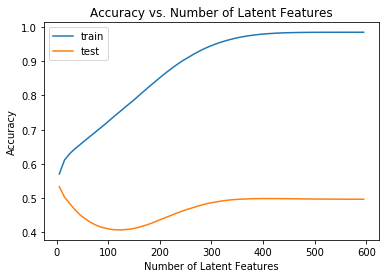

In [48]:
plt.plot(latent_features, 1 - (np.array(sum_train_errors)/(user_item_train.shape[0]*user_item_train.shape[1])), label='train')
plt.plot(latent_features, 1 - (np.array(sum_test_errors)/(user_item_test.shape[0]*user_item_test.shape[1])), label='test')
plt.legend(loc='best')
plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Latent Features')
plt.show()

<b>Based on above chart you can conclude that as number of latent feature increase our model shows overfitting of training data which is not we want so here as per chart we can see that around 10 latent features accuarcy is high for test data so we will use 10 number of latent features.</b>

In [49]:
u_train_10_latent, s_train_10_latent, vt_train_10_latent = u_train[:, :10], np.diag(s_train[:10]), vt_train[:10, :]
u_test_10_latent, vt_test_10_latent = u_test[:, :10], vt_test[:10,:]

In [50]:
user_item_test_preds_10_latent = np.around(np.dot(np.dot(u_test_10_latent, s_train_10_latent), vt_test_10_latent))

In [51]:
def recommend_movie_by_matrix_factorization(user_id, min_rating):
    user_index = user_id-1
    user_pred = user_item_test_preds_10_latent[user_index]
    user = user_item_test.iloc[user_index]
    
    idx=0
    recommend_movie_index = []
    
    for pred in user_pred:
        if pred >= min_rating:
            recommend_movie_index.append(idx)
        idx += 1
          
    recommend_movie = []

    for index in recommend_movie_index:
        if user.iloc[index] == 0:
            recommend_movie.append(user.index[index])
            
    return recommend_movie

In [52]:
recommend_movie_by_matrix_factorization(user_id = 1, min_rating = 4)

['American Beauty (1999)',
 'Back to the Future (1985)',
 'Groundhog Day (1993)',
 'Indiana Jones and the Last Crusade (1989)',
 'Jurassic Park (1993)',
 'Matrix, The (1999)',
 'Princess Bride, The (1987)',
 'Pulp Fiction (1994)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'Saving Private Ryan (1998)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Terminator 2: Judgment Day (1991)',
 'Terminator, The (1984)',
 'Total Recall (1990)']

<b>One of the main challenge in recommendation system is cold start problem whether it is a new user or new movie.<br>

For new user you can try popularity based model and from that you can capture behaviour of user.<br>

For new movies you can use content based model and recommend movie to user based on its genre<br></b>

<b>Evaluation of recommendation systems can be done by observing click through rate. You can compare two recommendation systems by A/B testing.</b>